In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\Имя\\Downloads\\group1_assignment\\ML-for-NLP-main'

In [3]:
train = pd.read_csv('train.csv')

## Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data.

### Missing Data

We can use seaborn to visualize missing data.

<AxesSubplot:>

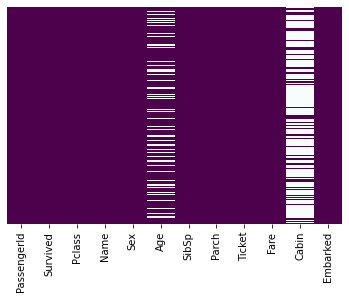

In [4]:
import seaborn as sns
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

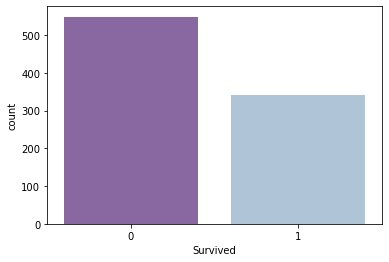

In [5]:
sns.set_style(None)
sns.countplot(x='Survived', data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Sex', ylabel='count'>

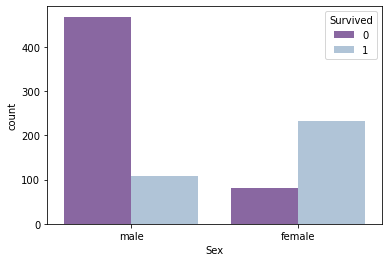

In [6]:
sns.countplot(x='Sex', hue='Survived', data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

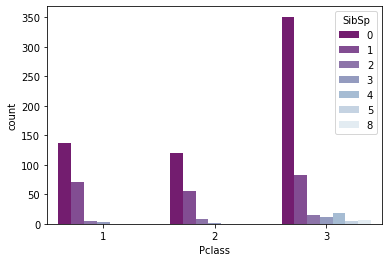

In [7]:
sns.countplot(x='Pclass', hue='SibSp', data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

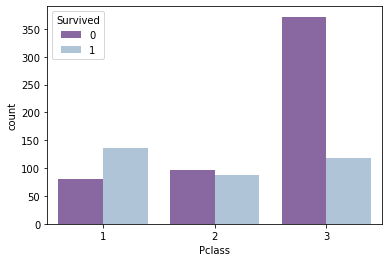

In [8]:
sns.countplot(x='Pclass', hue='Survived', data=train, palette='BuPu_r')

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

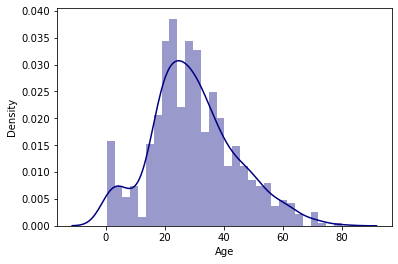

In [9]:
sns.distplot(train['Age'], color='navy', bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

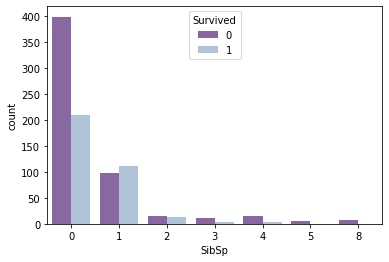

In [10]:
sns.countplot(x='SibSp', hue='Survived', data=train, palette='BuPu_r')

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

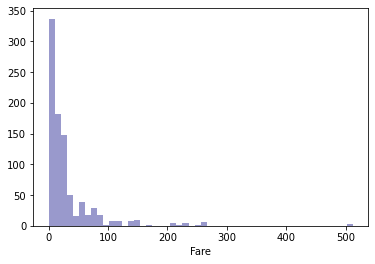

In [11]:
sns.distplot(train['Fare'], color='navy', bins=50, kde=False)

### Data Cleaning

The algorithms do not understand missing data so we need to tell the program exactly what to do with them. If we drop all missings observations, we drop a big chunk of the dataset. If we think age would be a good predictor of survival, then we should try to replace missing values.

- What are common approaches to deal with missing data?
- Make sure you know how does scikit-learn and pandas deal with missings.

Let's do a bit more explorations such as boxplots by survival category. 

<AxesSubplot:xlabel='Survived', ylabel='Age'>

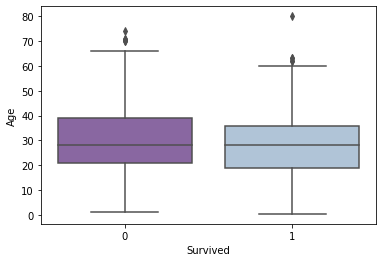

In [12]:
sns.boxplot(x='Survived', y='Age', data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

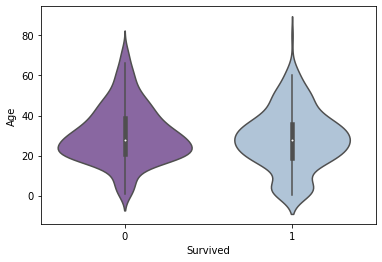

In [13]:
sns.violinplot(x='Survived', y='Age', data=train, palette='BuPu_r')

### Challenge: Interpret the boxplot of age (by survival).

C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


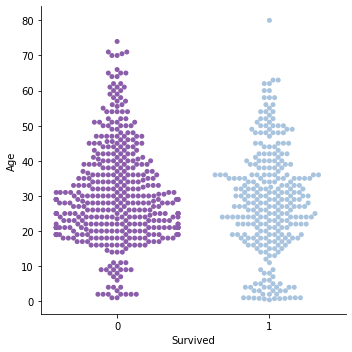

In [14]:
sns.catplot(y='Age', x='Survived', kind="swarm",  data=train,palette='BuPu_r')

C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


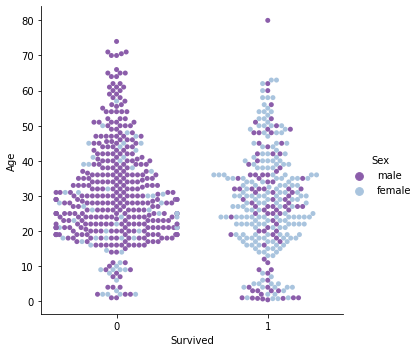

In [15]:
sns.catplot( x='Survived', y='Age', hue="Sex", kind="swarm", data=train, palette='BuPu_r')

In [16]:
#Now, let's finally replace some missing values :-)

train["Age"] = train.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

<AxesSubplot:>

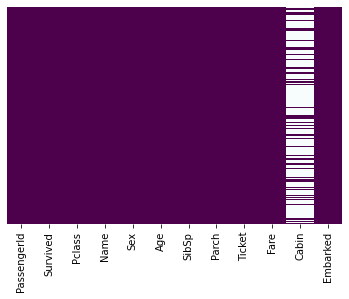

In [17]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='BuPu_r')

The Cabin column has a lot of missing values. We can create an indicator variable which takes value one in case cabin is missing.


In [18]:
train['cabin_missing'] = pd.isna(train['Cabin'])

train['cabin_missing'].describe()

count      891
unique       2
top       True
freq       687
Name: cabin_missing, dtype: object

## 1. Engineer at least two more features to include in your model 

(Examples are: https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/). 

For each feature perform visualizations and interpret them.

### Feature 1

We created an additional feature: based on the name columns, we can figure out whether a married couple was travelling together.

In [19]:
def append_travelling_together(df):
    df["husbands_lastname"] = np.where(
        df["Name"].str.contains("(", regex=False),
        df["Name"].str.split(",").str[0],
        None,
    )

    husband_names = df["husbands_lastname"].unique().tolist()[1:]

    df["travelling_together_with_spouse"] = False
    for name in husband_names:
        possible_marriage = df.loc[
            lambda x: (x["SibSp"] > 0) & (x["Name"].str.contains(name))
        ]

        if possible_marriage.shape[0] != 2:  # not a pair
            pass

        else:
            df.loc[
                lambda x: (x["SibSp"] > 0) & (x["Name"].str.contains(name)),
                "travelling_together_with_spouse",
            ] = True
    return df["travelling_together_with_spouse"].values


train["travelling_together_with_spouse"] = append_travelling_together(train)

In [20]:
train.loc[lambda x: x["travelling_together_with_spouse"] == True].sort_values(
    by=["Name"]
).head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_missing,husbands_lastname,travelling_together_with_spouse
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,True,None,True
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,True,Abbott,True
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C,True,None,True
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C,True,Abelson,True
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.80,NaN,S,True,None,True
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.80,NaN,S,True,Arnold-Franchi,True


<AxesSubplot:xlabel='Sex', ylabel='count'>

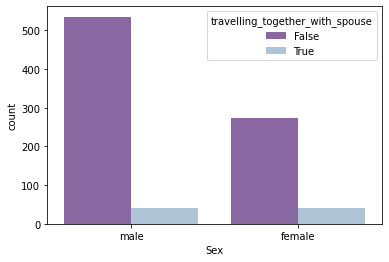

In [21]:
sns.countplot(x='Sex', hue='travelling_together_with_spouse', data=train, palette='BuPu_r')

More men travelled alone

In [22]:
train.groupby(["Sex","travelling_together_with_spouse"])["Survived"].mean().reset_index()

,Sex,travelling_together_with_spouse,Survived
0,female,False,0.725275
1,female,True,0.853659
2,male,False,0.175701
3,male,True,0.357143


couples had more chance to survive, both for women and men

<AxesSubplot:xlabel='SibSp', ylabel='count'>

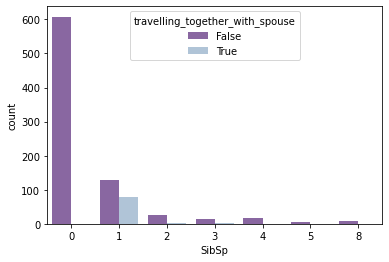

In [23]:
sns.countplot(x='SibSp', hue='travelling_together_with_spouse', data=train, palette='BuPu_r')

In [24]:
train.groupby("travelling_together_with_spouse")["SibSp"].value_counts()

travelling_together_with_spouse  SibSp
False                            0        608
                                 1        130
                                 2         26
                                 4         18
                                 3         14
                                 8          7
                                 5          5
True                             1         79
                                 2          2
                                 3          2
Name: SibSp, dtype: int64

Couples are more likely to travel together, but not with their children. Also, when travelling_together_with_spouse = False, there are a lot of SibSp, so those who travelled with their sibling or spouse are mutch more likely to travell with their sibling (and not spouse)

## Feature 2

There were some, who travelled without a Fare, maybe they are the crew?

In [25]:
train.loc[lambda x: x["Fare"]  < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_missing,husbands_lastname,travelling_together_with_spouse
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S,True,None,False
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,False,None,False
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S,True,None,False
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.740707,0,0,239853,0.0,NaN,S,True,None,False
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S,True,None,False
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.740707,0,0,239853,0.0,NaN,S,True,None,False
466,467,0,2,"Campbell, Mr. William",male,30.740707,0,0,239853,0.0,NaN,S,True,None,False
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.740707,0,0,239854,0.0,NaN,S,True,None,False
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S,True,None,False
633,634,0,1,"Parr, Mr. William Henry Marsh",male,41.281386,0,0,112052,0.0,NaN,S,True,None,False


Idea: create a dummy indicating crew member or not?

In [26]:
train["crew_member"] = np.where(train["Fare"] < 1, 1, 0)

## Feature 3

From the example above I can see that in Name column first goes the name, after which there is a "," sign. Then I want to split every value by "," and take the second value (fist in Python). Then I use the fact that titles are separated by the dot after - I will utilize it to extact titles by splitting by "." and taking the first (zero in Python) value. And I will use strip () to remove all the the leading and trailing spaces from a string..

In [27]:
train['Title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [28]:
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [29]:
train['Title'].describe()

count     891
unique     17
top        Mr
freq      517
Name: Title, dtype: object

In [30]:
train['Title'].unique() #check wether all titles extracted are indeed titles - looks like

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='count'>

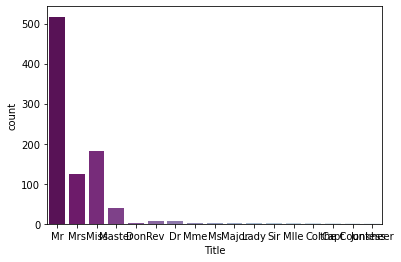

In [31]:
#Now let's look at count plot of Title column
sns.countplot(x ='Title', data=train,palette='BuPu_r')


As I can see, some titles are much more often to see. So, it makes sense to group some titles together. 

In [32]:
train["Title"] = train["Title"].replace(
    [
        "Lady",
        "the Countess",
        "Capt",
        "Col",
        "Don",
        "Dr",
        "Major",
        "Rev",
        "Sir",
        "Jonkheer",
        "Dona",
    ],
    "Rare",
)
train["Title"] = train["Title"].replace("Mlle", "Miss")
train["Title"] = train["Title"].replace("Ms", "Miss")
train["Title"] = train["Title"].replace("Mme", "Mrs")

<AxesSubplot:xlabel='Title', ylabel='count'>

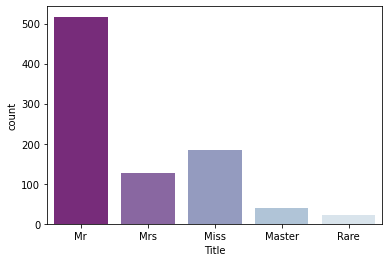

In [33]:
#Let's look at countplot again
sns.countplot(x ='Title', data=train,palette='BuPu_r')

As I can see, Mr is still the most common title. Rare titles even combined for a small proportion of the titles present on board

In [34]:
# I also want to look at survival rate by titles
# Survival rate by title group
train.groupby(['Title'])['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Master,40.0,0.575000,0.500641,0.0,0.0,1.0,1.0,1.0
Miss,185.0,0.702703,0.458309,0.0,0.0,1.0,1.0,1.0
Mr,517.0,0.156673,0.363844,0.0,0.0,0.0,0.0,1.0
Mrs,126.0,0.793651,0.406300,0.0,1.0,1.0,1.0,1.0
Rare,23.0,0.347826,0.486985,0.0,0.0,0.0,1.0,1.0


From the table enough I can say that titles Miss and Mrs were more likely to survive (which is not suprising since they are women). Mr has the lowest chance. And Rare titles also had a law probability to survive

## Feature 4

Variable wether the person is alone might be important because perhaps it allowed the passenger to fastly be evacuated because he didn't need to look for his family friends or family and just proceeded to evacuation. To obtain this variable, we first need to create family size variable which is obtained from siblings + spouse variable (SibSp) and parents + children variable (Parch)

In [35]:
#Generate variable family size
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 #i add 1 because i need to count person for whom I calculate as well

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

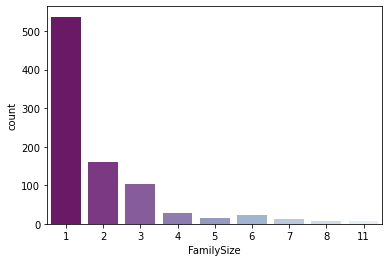

In [36]:
#let's built countplot for this variable
sns.countplot(x = 'FamilySize', data = train,palette='BuPu_r')

As we can, see it was most common to be alone. Then we have a high frequency of people whose family size on board is 2-3 and then for other size of family size the frequency is guite low


In [37]:
#How survival looks for different family sizes
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Surprisingly, among those who had a family size of 2-4 the chances to survive were higher. Perhaps it is because those families could afford to buy tickets for family members and were wealthier. Why then with number of family size of 5 and more chances of survival got lower? Perhaps 2-4 family members is also an indicator of middle and upper class. While 5 and more family size shows poorer families.

In [38]:
#Now let's create IsAlone variable if person was on Titanic without family members
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

<AxesSubplot:xlabel='IsAlone', ylabel='count'>

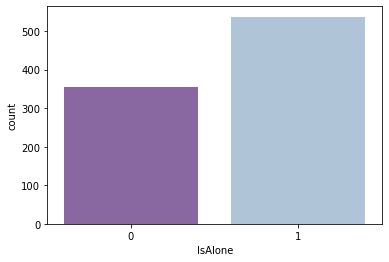

In [39]:
#Let's look at countplot
sns.countplot(x = 'IsAlone', data = train,palette='BuPu_r')

There are more people who were on Titanic alone

In [40]:
#Let's look at survival rate
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Indeed, for a person who is alone, the survival chances are higher

 ## 2. Can you think of possible interactions and polynomials potentially relevant for your model? If yes, do so.

I would be interested in the interaction of Age and Sex. We know, that women has a greater chance of survival than men, but how does this relate to one's age?

In [41]:
train["sex"] = np.where(train["Sex"] == "male", 1, 0)

In [42]:
train["Age*Sex"] = train["Age"] * train["sex"]

Take Age squared, which seems a pretty basic idea

In [43]:
train["age2"] = train["Age"]**2

NOTE to Adam: here because of my added variables we have more categorical variables. Plus, I want to drop family size because family size and is alone may be correlated and then later dropped by LASSO randomly (right?)

In [44]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)
title = pd.get_dummies(train['Title'], drop_first=True)

In [45]:
train.drop(
    [
        "Sex",
        "Embarked",
        "Name",
        "Ticket",
        "PassengerId",
        "Pclass",
        "Cabin",
        "husbands_lastname",
        "Title",
        "sex",
        "FamilySize",
    ],
    axis=1,
    inplace=True,
)

In [46]:
train = pd.concat([train, sex, embark, pclass, title], axis=1) #here also need title (ADAM!)

In [47]:
train.head()

,Survived,Age,SibSp,Parch,Fare,cabin_missing,travelling_together_with_spouse,crew_member,IsAlone,Age*Sex,age2,male,Q,S,2,3,Miss,Mr,Mrs,Rare
0,0,22.0,1,0,7.2500,True,False,0,0,22.0,484.0,1,0,1,0,1,0,1,0,0
1,1,38.0,1,0,71.2833,False,False,0,0,0.0,1444.0,0,0,0,0,0,0,0,1,0
2,1,26.0,0,0,7.9250,True,False,0,1,0.0,676.0,0,0,1,0,1,1,0,0,0
3,1,35.0,1,0,53.1000,False,True,0,0,0.0,1225.0,0,0,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,True,False,0,1,35.0,1225.0,1,0,1,0,1,0,1,0,0


In [48]:
initial_model_data = train.filter(
    ["Survived", "Age", "SibSp", "Parch", "Fare", "cabin_missing", "S", "Q", 2, 3, "male"]
)

In [49]:
initial_model_data

,Survived,Age,SibSp,Parch,Fare,cabin_missing,S,Q,2,3,male
0,0,22.00,1,0,7.2500,True,1,0,0,1,1
1,1,38.00,1,0,71.2833,False,0,0,0,0,0
2,1,26.00,0,0,7.9250,True,1,0,0,1,0
3,1,35.00,1,0,53.1000,False,1,0,0,0,0
4,0,35.00,0,0,8.0500,True,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.00,0,0,13.0000,True,1,0,1,0,1
887,1,19.00,0,0,30.0000,False,1,0,0,0,0
888,0,21.75,1,2,23.4500,True,1,0,0,1,0
889,1,26.00,0,0,30.0000,False,0,0,0,0,1


In [50]:
more_complex_model_data = train.copy()

## 3. Include the new features --generated in 1 and  2 -- in your model. Does your model improve? What measures did you use to determine this? Interpret coefficients. Do the signs of the coefficients make sense? Why and why not? 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

def get_split(train, seed=12):
    X = train.drop("Survived", axis=1)
    y = train["Survived"]

    return train_test_split(X, y, random_state=seed, stratify=y)

### 1. get initial model performance

In [52]:
X_train, X_test, y_train, y_test = get_split(initial_model_data)

logreg = LogisticRegression()
X_train = preprocessing.scale(X_train)

logreg.fit(X_train, y_train)

X_test = preprocessing.scale(X_test)
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       137
           1       0.79      0.73      0.76        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [53]:
best_model = logreg

In [54]:
X_test_bm = X_test
y_test_bm = y_test
X_train_bm = X_train
y_train_bm = y_train

### 2. more complex model

In [55]:
X_train, X_test, y_train, y_test = get_split(more_complex_model_data)

logreg = LogisticRegression()
X_train = preprocessing.scale(X_train)

logreg.fit(X_train, y_train)

X_test = preprocessing.scale(X_test)
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       137
           1       0.76      0.73      0.75        86

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



Let's print the coefficients of our model

In [56]:
print(logreg.coef_)

[[-0.38523295 -0.64294078 -0.19093378  0.18824192 -0.53978352  0.37791565
  -0.51094781  0.20036703 -0.21036717  0.17298638 -0.08061549 -0.11018232
  -0.10314917 -0.02583299 -0.62618388 -0.29718218 -1.70940547 -0.11998242
  -0.45272665]]


In [57]:
print(logreg.intercept_)

[-0.7257936]


Interpretation: in general, since our exercise is prediction and we don't care about causal effect, we are only interested in the fact that the sign of coefficient makes sense (which ensures our model is reasonable). Also, these coefficients are not interpretable as for a Logistic Regression one should calculate marginal effects to interpret magnituted. In general, signs of coefficients make sense.

## 4. Check the balance of your classes. How many observations do you have in each class? Do you have a class imbalance? 

<AxesSubplot:xlabel='Survived', ylabel='count'>

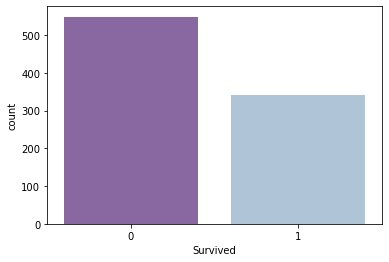

In [58]:
#Let's look at countplot
sns.countplot(x = 'Survived', data = train,palette='BuPu_r')


In [59]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [60]:
train["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## 5. What google/stack overflow search would you carry out to correct for class imbalance? (Yes, you should type the google search you did and copy-paste the link of the answer.) Correct potential class imbalance, if you think it’s important to do so.

We think that the 61-39 share of classes are not a big problem of class imbalance (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/, https://towardsdatascience.com/how-to-effectively-predict-imbalanced-classes-in-python-e8cd3b5720c4 ).

Nevertheless we tried a simple downsampling to account for the little imbalancedness: https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/

1. Separate the two classes

In [61]:
survived = more_complex_model_data.loc[lambda x: x["Survived"] == 1]
not_survived = more_complex_model_data.loc[lambda x: x["Survived"] == 0]

In [62]:
survived.shape[0]

342

2. downsample not survived observations

In [63]:
from sklearn.utils import resample

not_survived_downsample = resample(
    not_survived, replace=True, n_samples=survived.shape[0], random_state=42
)

print(not_survived_downsample.shape)

(342, 20)


In [64]:
more_complex_model_data_downsampled = pd.concat([survived,not_survived_downsample])

In [65]:
X_train, X_test, y_train, y_test = get_split(more_complex_model_data_downsampled)

logreg = LogisticRegression()
X_train = preprocessing.scale(X_train)

logreg.fit(X_train, y_train)

X_test = preprocessing.scale(X_test)
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        85
           1       0.83      0.83      0.83        86

    accuracy                           0.82       171
   macro avg       0.82      0.82      0.82       171
weighted avg       0.82      0.82      0.82       171



## 6. Use Lasso and Ridge for regularization. Use cross-validation to select the tuning parameter.

In [66]:
X_train, X_test, y_train, y_test = get_split(more_complex_model_data)

## Lasso CV

In [67]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings

warnings.filterwarnings('ignore')

lasso = make_pipeline(
    StandardScaler(with_mean=False), LassoCV(eps=0.01, cv=5, random_state=0)
).fit(X_train, y_train)

predictions = np.where(lasso.predict(X_train) > 0.5, 1, 0)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       412
           1       0.81      0.75      0.78       256

    accuracy                           0.84       668
   macro avg       0.83      0.82      0.82       668
weighted avg       0.83      0.84      0.83       668



In [68]:
predictions = np.where(lasso.predict(X_test) > 0.5, 1, 0)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       137
           1       0.78      0.73      0.75        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.82      0.82       223



## Ridge CV

In [69]:
from sklearn.linear_model import RidgeClassifierCV

In [70]:
ridge = make_pipeline(
    StandardScaler(with_mean=False), RidgeClassifierCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 2*1e-1, 1])
).fit(X_train, y_train)

In [71]:
predictions = np.where(ridge.predict(X_train) > 0.5, 1, 0)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       412
           1       0.82      0.74      0.78       256

    accuracy                           0.84       668
   macro avg       0.83      0.82      0.83       668
weighted avg       0.84      0.84      0.84       668



In [72]:
predictions = np.where(ridge.predict(X_test) > 0.5, 1, 0)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       137
           1       0.79      0.73      0.76        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



# 7. Use your best model to generate predictions for test.csv. Identify features that are important for your best model. Which features are most influential, and which features could be removed without a decrease in performance? Does removing irrelevant features make your model better?

Several of our models give the same accuracy (0.82). In this case we chose the simplest one in terms of complexity - the initial model from class

In [73]:
#First, import test data set
test = pd.read_csv('test.csv')

In [74]:
#Check whether there are any missings in test
test.isnull().sum() #same missings as in train, but also in fare as well

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [75]:
#Replace all the missings
test["Age"] = test.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
test['cabin_missing'] = pd.isna(test['Cabin'])
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

In [76]:
test.isnull().sum() #now only cabin missing, but I will drop it anyway

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
cabin_missing      0
dtype: int64

In [77]:
# create dummies for categorical variables
sex = pd.get_dummies(test["Sex"], drop_first=True)
embark = pd.get_dummies(test["Embarked"], drop_first=True)
pclass = pd.get_dummies(test["Pclass"], drop_first=True)

In [78]:
test.drop(
    [
        "Sex",
        "Embarked",
        "Name",
        "Ticket",
        "PassengerId",
        "Pclass",
        "Cabin",
    ],
    axis=1,
    inplace=True,
)

In [79]:
test = pd.concat([test, sex, embark, pclass], axis=1)

In [80]:
#Now let's predict
survival_prediction = best_model.predict(test)

In [81]:
survival_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [82]:
#Importance of features

In [83]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [84]:
X_test.shape


(223, 19)

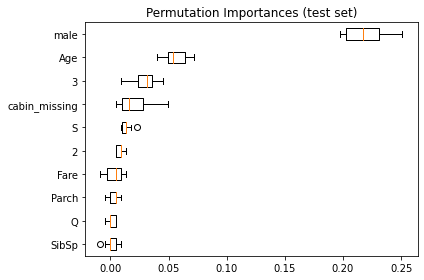

In [85]:
result = permutation_importance(
    best_model, X_test_bm, y_test_bm, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=initial_model_data.drop("Survived", axis=1).columns[sorted_idx],
)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

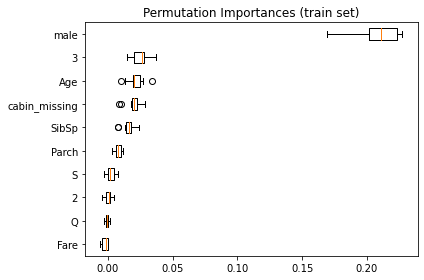

In [86]:
result = permutation_importance(
    best_model, X_train_bm, y_train_bm, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=initial_model_data.drop("Survived", axis=1).columns[sorted_idx],
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

Interpretation: As we can see, the most important feature for the model is sex, it is significantly more important than others. One of the least important features is Fare. We can drop it to see whether performance of the model increases, if we drop Fare

In [87]:
initial_model_data.columns

Index([     'Survived',           'Age',         'SibSp',         'Parch',
                'Fare', 'cabin_missing',             'S',             'Q',
                     2,               3,          'male'],
      dtype='object')

In [88]:
new_model = initial_model_data

In [89]:
new_model.columns

Index([     'Survived',           'Age',         'SibSp',         'Parch',
                'Fare', 'cabin_missing',             'S',             'Q',
                     2,               3,          'male'],
      dtype='object')

In [90]:
new_model.drop('Fare', axis=1, inplace = True)

In [91]:
X_train, X_test, y_train, y_test = get_split(new_model)

logreg = LogisticRegression()
X_train = preprocessing.scale(X_train)

logreg.fit(X_train, y_train)

X_test = preprocessing.scale(X_test)
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       137
           1       0.80      0.74      0.77        86

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



Conclusion: accuracy of the model indeed improved (became 0.83 instead of 0.82)